In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import svm

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import cross_val_score

In [15]:
star=pd.read_csv('stars.csv')
star

Temperature        L        R    A_M           Type
0          19860  0.00110  0.01310  11.34    White Dwarf
1          21020  0.00150  0.01120  11.52    White Dwarf
2          18290  0.00130  0.00934  12.78    White Dwarf
3          16790  0.00140  0.01210  12.87    White Dwarf
4          15680  0.00122  0.01140  11.92    White Dwarf
..           ...      ...      ...    ...            ...
235         5936  1.35700  1.10600   4.46  Main Sequence
236         5587  0.81900  0.99000   5.03  Main Sequence
237         5300  0.59000  0.91000   5.49  Main Sequence
238         7720  7.92000  1.34000   2.44  Main Sequence
239         8250  9.25000  1.93000  -0.98  Main Sequence

[240 rows x 5 columns]

In [8]:
def numerize(data):
    if data=='White Dwarf':
        data=0
    elif data=='Red Dwarf':
        data=1
    elif data=='Brown Dwarf':
        data=2
    elif data=='Super Giants':
        data=3
    elif data=='Hyper Giants':
        data=4
    elif data=='Main Sequence':
        data=5
    return data

In [12]:
star = star.sample(n=None, frac=1, replace=False, weights=None, random_state=42, axis=None)
star = star.reset_index(drop=True)
rn = (1/6)*star.shape[0]
# train1=star.loc[:rn-1]
# train2=star.loc[rn:2*rn-1]
# train3=star.loc[2*rn:3*rn-1]
# train4=star.loc[3*rn:4*rn-1]
# train5=star.loc[4*rn:5*rn-1]
test=star.loc[5*rn:]
star=star[~star.index.isin(test.index)]

In [5]:
def scalarization(data, k):
    _range = k
    return (data - np.min(data)) / _range

In [6]:
def normalization(data):
    return (data-np.min(data))/(np.max(data)-np.min(data))

In [9]:
for i in range(5):
    if i!=5:
        validX=star.loc[i*rn:(i+1)*rn-1,['Temperature','L','R','A_M']]
        validY=star.loc[i*rn:(i+1)*rn-1,['Type']]
    else:
        validX=star.loc[i*rn:,['Temperature','L','R','A_M']]
        validY=star.loc[i*rn:,['Type']]
    train=star[~star.index.isin(validX.index)]
    trainX=train.loc[:,['Temperature','L','R','A_M']]
    trainY=train['Type']
    trainX['Temperature']=normalization(trainX['Temperature'])
    trainX['L']=normalization(trainX['L'])
    trainX['R']=normalization(trainX['R'])
    trainX['A_M']=normalization(trainX['A_M'])
    validX['Temperature']=normalization(validX['Temperature'])
    validX['L']=normalization(validX['L'])
    validX['R']=normalization(validX['R'])
    validX['A_M']=normalization(validX['A_M'])
    svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
    scores = svmC.score(validX, validY)
    print(scores)

0.75
0.725
0.725
0.775
0.825


Scale you want--Enter N if you want normalization:N
Feature name you want to re-scalarization:Temperature
0.75


G:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


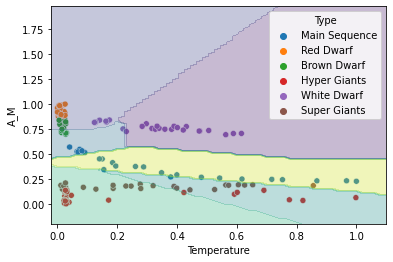

In [10]:
#No.1
#This block has function of choosing feature name, for other blocks we use default feature name.
i=0
if i!=5:
    validX=star.loc[i*rn:(i+1)*rn-1,['Temperature','L','R','A_M']]
    validY=star.loc[i*rn:(i+1)*rn-1,['Type']]
else:
    validX=star.loc[i*rn:,['Temperature','L','R','A_M']]
    validY=star.loc[i*rn:,['Type']]
train=star[~star.index.isin(validX.index)]
trainX=train.loc[:,['Temperature','L','R','A_M']]
trainY=train['Type']
scale=input("Scale you want--Enter N if you want normalization:")
feature=input("Feature name you want to re-scalarization:")
if scale=='N':
    trainX['Temperature']=normalization(trainX['Temperature'])
    trainX['L']=normalization(trainX['L'])
    trainX['R']=normalization(trainX['R'])
    trainX['A_M']=normalization(trainX['A_M'])
    validX['Temperature']=normalization(validX['Temperature'])
    validX['L']=normalization(validX['L'])
    validX['R']=normalization(validX['R'])
    validX['A_M']=normalization(validX['A_M'])
    ht=0.02
else:
    scale=float(scale)
    trainX['A_M']=scalarization(trainX['A_M'], scale)
    validX['A_M']=scalarization(validX['A_M'], scale)
    ht=200
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(validX, validY)
print(scores)
#     sns.pairplot(pd.concat([trainX,trainY],axis=1),hue='Type')

plotX=trainX.loc[:,['Temperature','A_M']]
plotY=trainY
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(plotX, plotY)
h=0.02
xx, yy = np.meshgrid(np.arange(np.min(plotX['Temperature'])-ht, np.max(plotX['Temperature'])+5*ht, ht),
                        np.arange(np.min(plotX['A_M'])-10*h, np.max(plotX['A_M'])+50*h, h))
Z = svmC.predict(np.c_[xx.ravel(), yy.ravel()])
temp=[]
for point in Z:
    point=numerize(point)
    temp.append(point)
Z=np.array(temp).reshape(xx.shape)
sns.scatterplot(plotX['Temperature'], plotX['A_M'],hue=plotY)
plt.contourf(xx, yy, Z, alpha=0.3)
i+=1

Scale you want--Enter N if you want normalization:0.5
0.95


G:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


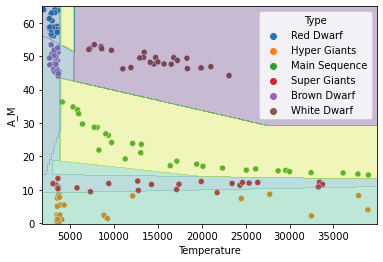

In [33]:
#No.2
if i!=5:
    validX=star.loc[i*rn:(i+1)*rn-1,['Temperature','L','R','A_M']]
    validY=star.loc[i*rn:(i+1)*rn-1,['Type']]
else:
    validX=star.loc[i*rn:,['Temperature','L','R','A_M']]
    validY=star.loc[i*rn:,['Type']]
train=star[~star.index.isin(validX.index)]
trainX=train.loc[:,['Temperature','L','R','A_M']]
trainY=train['Type']
scale=input("Scale you want--Enter N if you want normalization:")
if scale=='N':
    trainX['Temperature']=normalization(trainX['Temperature'])
    trainX['L']=normalization(trainX['L'])
    trainX['R']=normalization(trainX['R'])
    trainX['A_M']=normalization(trainX['A_M'])
    validX['Temperature']=normalization(validX['Temperature'])
    validX['L']=normalization(validX['L'])
    validX['R']=normalization(validX['R'])
    validX['A_M']=normalization(validX['A_M'])
    ht=0.02
else:
    scale=float(scale)
    trainX['A_M']=scalarization(trainX['A_M'], scale)
    validX['A_M']=scalarization(validX['A_M'], scale)
    ht=200
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(validX, validY)
print(scores)
#     sns.pairplot(pd.concat([trainX,trainY],axis=1),hue='Type')

plotX=trainX.loc[:,['Temperature','A_M']]
plotY=trainY
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(plotX, plotY)
h=0.02
xx, yy = np.meshgrid(np.arange(np.min(plotX['Temperature'])-ht, np.max(plotX['Temperature'])+5*ht, ht),
                        np.arange(np.min(plotX['A_M'])-10*h, np.max(plotX['A_M'])+50*h, h))
Z = svmC.predict(np.c_[xx.ravel(), yy.ravel()])
temp=[]
for point in Z:
    point=numerize(point)
    temp.append(point)
Z=np.array(temp).reshape(xx.shape)
sns.scatterplot(plotX['Temperature'], plotX['A_M'],hue=plotY)
plt.contourf(xx, yy, Z, alpha=0.3)
i+=1

Scale you want--Enter N if you want normalization:0.2
1.0


G:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


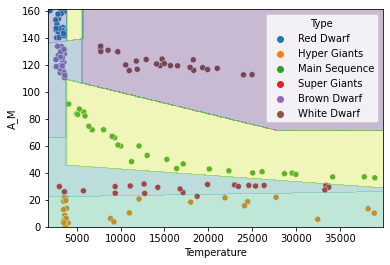

In [35]:
#No.3
i=2
if i!=5:
    validX=star.loc[i*rn:(i+1)*rn-1,['Temperature','L','R','A_M']]
    validY=star.loc[i*rn:(i+1)*rn-1,['Type']]
else:
    validX=star.loc[i*rn:,['Temperature','L','R','A_M']]
    validY=star.loc[i*rn:,['Type']]
train=star[~star.index.isin(validX.index)]
trainX=train.loc[:,['Temperature','L','R','A_M']]
trainY=train['Type']
scale=input("Scale you want--Enter N if you want normalization:")
if scale=='N':
    trainX['Temperature']=normalization(trainX['Temperature'])
    trainX['L']=normalization(trainX['L'])
    trainX['R']=normalization(trainX['R'])
    trainX['A_M']=normalization(trainX['A_M'])
    validX['Temperature']=normalization(validX['Temperature'])
    validX['L']=normalization(validX['L'])
    validX['R']=normalization(validX['R'])
    validX['A_M']=normalization(validX['A_M'])
    ht=0.02
else:
    scale=float(scale)
    trainX['A_M']=scalarization(trainX['A_M'], scale)
    validX['A_M']=scalarization(validX['A_M'], scale)
    ht=200
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(validX, validY)
print(scores)
#     sns.pairplot(pd.concat([trainX,trainY],axis=1),hue='Type')

plotX=trainX.loc[:,['Temperature','A_M']]
plotY=trainY
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(plotX, plotY)
h=0.02
xx, yy = np.meshgrid(np.arange(np.min(plotX['Temperature'])-200, np.max(plotX['Temperature'])+1000, ht),
                        np.arange(np.min(plotX['A_M'])-0.2, np.max(plotX['A_M'])+1, h))
Z = svmC.predict(np.c_[xx.ravel(), yy.ravel()])
temp=[]
for point in Z:
    point=numerize(point)
    temp.append(point)
Z=np.array(temp).reshape(xx.shape)
sns.scatterplot(plotX['Temperature'], plotX['A_M'],hue=plotY)
plt.contourf(xx, yy, Z, alpha=0.3)
i+=1

Scale you want--Enter N if you want normalization:0.1
0.975


G:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


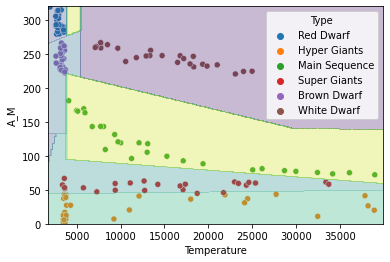

In [36]:
#No.4
if i!=5:
    validX=star.loc[i*rn:(i+1)*rn-1,['Temperature','L','R','A_M']]
    validY=star.loc[i*rn:(i+1)*rn-1,['Type']]
else:
    validX=star.loc[i*rn:,['Temperature','L','R','A_M']]
    validY=star.loc[i*rn:,['Type']]
train=star[~star.index.isin(validX.index)]
trainX=train.loc[:,['Temperature','L','R','A_M']]
trainY=train['Type']
scale=input("Scale you want--Enter N if you want normalization:")
if scale=='N':
    trainX['Temperature']=normalization(trainX['Temperature'])
    trainX['L']=normalization(trainX['L'])
    trainX['R']=normalization(trainX['R'])
    trainX['A_M']=normalization(trainX['A_M'])
    validX['Temperature']=normalization(validX['Temperature'])
    validX['L']=normalization(validX['L'])
    validX['R']=normalization(validX['R'])
    validX['A_M']=normalization(validX['A_M'])
    ht=0.02
else:
    scale=float(scale)
    trainX['A_M']=scalarization(trainX['A_M'], scale)
    validX['A_M']=scalarization(validX['A_M'], scale)
    ht=200
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(validX, validY)
print(scores)
#     sns.pairplot(pd.concat([trainX,trainY],axis=1),hue='Type')

plotX=trainX.loc[:,['Temperature','A_M']]
plotY=trainY
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(plotX, plotY)
h=0.02
xx, yy = np.meshgrid(np.arange(np.min(plotX['Temperature'])-200, np.max(plotX['Temperature'])+1000, ht),
                        np.arange(np.min(plotX['A_M'])-0.2, np.max(plotX['A_M'])+1, h))
Z = svmC.predict(np.c_[xx.ravel(), yy.ravel()])
temp=[]
for point in Z:
    point=numerize(point)
    temp.append(point)
Z=np.array(temp).reshape(xx.shape)
sns.scatterplot(plotX['Temperature'], plotX['A_M'],hue=plotY)
plt.contourf(xx, yy, Z, alpha=0.3)
i+=1

Scale you want--Enter N if you want normalization:0.16667
0.975


G:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


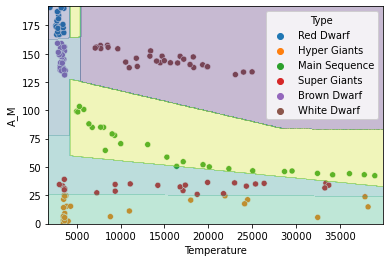

In [37]:
#No.5
i=4
if i!=5:
    validX=star.loc[i*rn:(i+1)*rn-1,['Temperature','L','R','A_M']]
    validY=star.loc[i*rn:(i+1)*rn-1,['Type']]
else:
    validX=star.loc[i*rn:,['Temperature','L','R','A_M']]
    validY=star.loc[i*rn:,['Type']]
train=star[~star.index.isin(validX.index)]
trainX=train.loc[:,['Temperature','L','R','A_M']]
trainY=train['Type']
scale=input("Scale you want--Enter N if you want normalization:")
if scale=='N':
    trainX['Temperature']=normalization(trainX['Temperature'])
    trainX['L']=normalization(trainX['L'])
    trainX['R']=normalization(trainX['R'])
    trainX['A_M']=normalization(trainX['A_M'])
    validX['Temperature']=normalization(validX['Temperature'])
    validX['L']=normalization(validX['L'])
    validX['R']=normalization(validX['R'])
    validX['A_M']=normalization(validX['A_M'])
    ht=0.02
else:
    scale=float(scale)
    trainX['A_M']=scalarization(trainX['A_M'], scale)
    validX['A_M']=scalarization(validX['A_M'], scale)
    ht=200
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(validX, validY)
print(scores)
#     sns.pairplot(pd.concat([trainX,trainY],axis=1),hue='Type')

plotX=trainX.loc[:,['Temperature','A_M']]
plotY=trainY
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(plotX, plotY)
h=0.02
xx, yy = np.meshgrid(np.arange(np.min(plotX['Temperature'])-200, np.max(plotX['Temperature'])+1000, ht),
                        np.arange(np.min(plotX['A_M'])-0.2, np.max(plotX['A_M'])+1, h))
Z = svmC.predict(np.c_[xx.ravel(), yy.ravel()])
temp=[]
for point in Z:
    point=numerize(point)
    temp.append(point)
Z=np.array(temp).reshape(xx.shape)
sns.scatterplot(plotX['Temperature'], plotX['A_M'],hue=plotY)
plt.contourf(xx, yy, Z, alpha=0.3)
i+=1

0.975


G:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


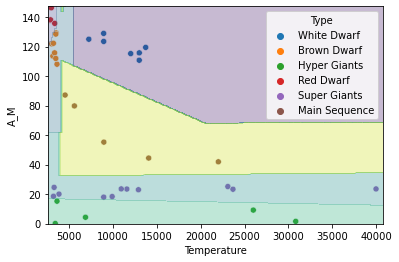

In [40]:
testX=test.loc[:,['Temperature','L','R','A_M']]
testY=test['Type']
trainX=star.loc[:,['Temperature','L','R','A_M']]
trainY=star['Type']
trainX['A_M']=scalarization(trainX['A_M'], 0.2)
testX['A_M']=scalarization(testX['A_M'], 0.2)
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(testX, testY)
print(scores)

plotX=testX.loc[:,['Temperature','A_M']]
plotY=testY
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(plotX, plotY)
h=0.02
xx, yy = np.meshgrid(np.arange(np.min(plotX['Temperature'])-200, np.max(plotX['Temperature'])+1000, 200),
                        np.arange(np.min(plotX['A_M'])-0.2, np.max(plotX['A_M'])+1, h))
Z = svmC.predict(np.c_[xx.ravel(), yy.ravel()])
temp=[]
for point in Z:
    point=numerize(point)
    temp.append(point)
Z=np.array(temp).reshape(xx.shape)
sns.scatterplot(plotX['Temperature'], plotX['A_M'],hue=plotY)
plt.contourf(xx, yy, Z, alpha=0.3)

In [36]:
health=pd.read_csv('fetal_health.csv')
healthX=health.iloc[:,:-1]
healthY=health.loc[:,['fetal_health']]

In [37]:
import sklearn.decomposition as dp
pca=dp.PCA(n_components=4)
reduced_healthX=pd.DataFrame(pca.fit_transform(healthX))
reduced_healthX.columns=['PCA1','PCA2','PCA3','PCA4']
reduced_healthX

PCA1       PCA2       PCA3       PCA4
0     20.935588  44.635967  44.263293  32.750981
1     61.820550 -30.328671 -29.888047  -7.346804
2     62.558110 -29.136283 -29.587214  -8.235861
3     56.664179 -10.113211 -37.556305  -4.410402
4     55.525165 -11.092081 -39.094485  -4.052732
...         ...        ...        ...        ...
2121 -57.912826 -27.280968  21.209963  13.880191
2122 -22.861429 -25.226227   4.530016  26.798897
2123 -21.576865 -26.705402   5.223130  26.042737
2124 -23.194175 -24.735801   6.679313  29.617281
2125 -49.550985  -8.415905  12.812667  26.059936

[2126 rows x 4 columns]

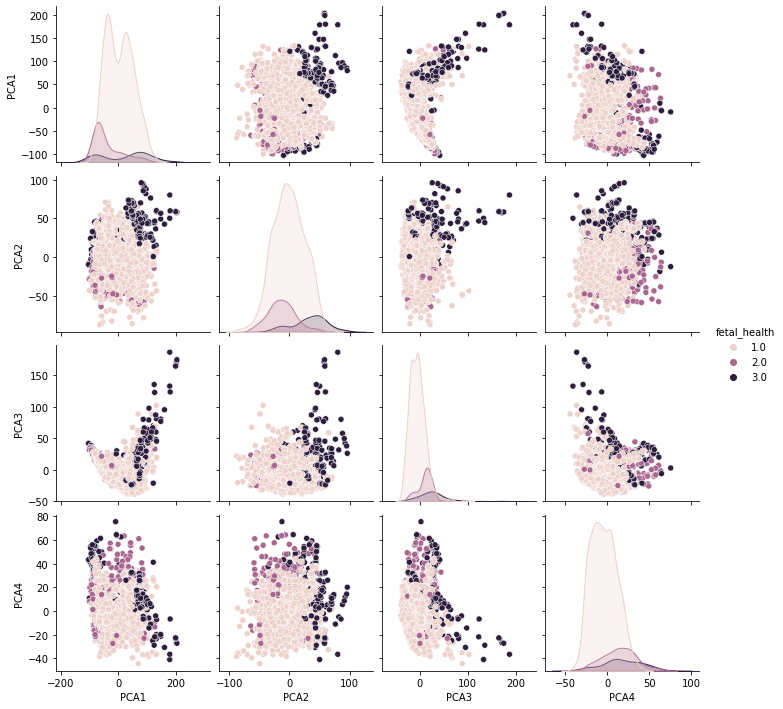

In [4]:
sns.pairplot(pd.concat([reduced_healthX,healthY],axis=1),hue='fetal_health')

In [38]:
rn = int((1/6)*reduced_healthX.shape[0])
testX=reduced_healthX.loc[5*rn:]
testY=healthY.loc[5*rn:]
reduced_healthX=reduced_healthX[~reduced_healthX.index.isin(testX.index)]
reduced_healthY=healthY[~healthY.index.isin(testY.index)]
rn 

354

Scale you want--Enter N if you want normalization:0.5


C:\Users\hp\AppData\Local\Temp/ipykernel_13248/4189338744.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX['PCA3']=scalarization(trainX['PCA3'], scale)
G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8305084745762712


G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
G:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


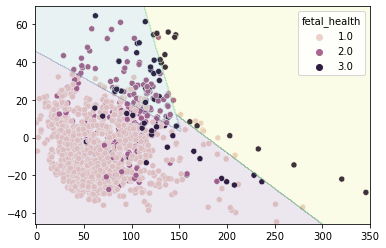

In [9]:
#No.1
i=0
validX=reduced_healthX.loc[i*rn:(i+1)*rn-1,['PCA1','PCA2','PCA3','PCA4']]
validY=reduced_healthY.loc[i*rn:(i+1)*rn-1]
trainX=reduced_healthX[~reduced_healthX.index.isin(validX.index)]
trainY=reduced_healthY[~reduced_healthY.index.isin(validY.index)]
scale=input("Scale you want--Enter N if you want normalization:")
if scale=='N':
    trainX['PCA1']=normalization(trainX['PCA1'])
    trainX['PCA2']=normalization(trainX['PCA2'])
    trainX['PCA3']=normalization(trainX['PCA3'])
    trainX['PCA4']=normalization(trainX['PCA4'])
    validX['PCA1']=normalization(validX['PCA1'])
    validX['PCA2']=normalization(validX['PCA2'])
    validX['PCA3']=normalization(validX['PCA3'])
    validX['PCA4']=normalization(validX['PCA4'])
    ht=0.01
else:
    scale=float(scale)
    trainX['PCA3']=scalarization(trainX['PCA3'], scale)
    validX['PCA3']=scalarization(validX['PCA3'], scale)
    ht=1
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(validX, validY)
print(scores)
#     sns.pairplot(pd.concat([trainX,trainY],axis=1),hue='Type')

plotX=trainX.loc[:,['PCA3','PCA4']]
plotY=trainY
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(plotX, plotY)
h=0.1
xx, yy = np.meshgrid(np.arange(np.min(plotX['PCA3'])-ht, np.max(plotX['PCA3'])+5*ht, ht),
                        np.arange(np.min(plotX['PCA4'])-10*h, np.max(plotX['PCA4'])+50*h, h))
Z = svmC.predict(np.c_[xx.ravel(), yy.ravel()])
temp=[]
for point in Z:
    temp.append(point)
Z=np.array(temp).reshape(xx.shape)
sns.scatterplot(np.array(plotX['PCA3']), np.array(plotX['PCA4']),hue=plotY['fetal_health'])
plt.contourf(xx, yy, Z, alpha=0.1)
i+=1

Scale you want--Enter N if you want normalization:0.75


C:\Users\hp\AppData\Local\Temp/ipykernel_13248/888147408.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX['PCA3']=scalarization(trainX['PCA3'], scale)
G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7570621468926554


G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
G:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


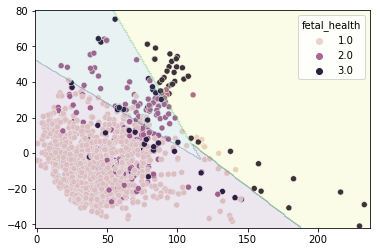

In [12]:
#No.2
i=1
validX=reduced_healthX.loc[i*rn:(i+1)*rn-1,['PCA1','PCA2','PCA3','PCA4']]
validY=reduced_healthY.loc[i*rn:(i+1)*rn-1]
trainX=reduced_healthX[~reduced_healthX.index.isin(validX.index)]
trainY=reduced_healthY[~reduced_healthY.index.isin(validY.index)]
scale=input("Scale you want--Enter N if you want normalization:")
if scale=='N':
    trainX['PCA1']=normalization(trainX['PCA1'])
    trainX['PCA2']=normalization(trainX['PCA2'])
    trainX['PCA3']=normalization(trainX['PCA3'])
    trainX['PCA4']=normalization(trainX['PCA4'])
    validX['PCA1']=normalization(validX['PCA1'])
    validX['PCA2']=normalization(validX['PCA2'])
    validX['PCA3']=normalization(validX['PCA3'])
    validX['PCA4']=normalization(validX['PCA4'])
    ht=0.01
else:
    scale=float(scale)
    trainX['PCA3']=scalarization(trainX['PCA3'], scale)
    validX['PCA3']=scalarization(validX['PCA3'], scale)
    ht=1
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(validX, validY)
print(scores)
#     sns.pairplot(pd.concat([trainX,trainY],axis=1),hue='Type')

plotX=trainX.loc[:,['PCA3','PCA4']]
plotY=trainY
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(plotX, plotY)
h=0.1
xx, yy = np.meshgrid(np.arange(np.min(plotX['PCA3'])-ht, np.max(plotX['PCA3'])+5*ht, ht),
                        np.arange(np.min(plotX['PCA4'])-10*h, np.max(plotX['PCA4'])+50*h, h))
Z = svmC.predict(np.c_[xx.ravel(), yy.ravel()])
temp=[]
for point in Z:
    temp.append(point)
Z=np.array(temp).reshape(xx.shape)
sns.scatterplot(np.array(plotX['PCA3']), np.array(plotX['PCA4']),hue=plotY['fetal_health'])
plt.contourf(xx, yy, Z, alpha=0.1)

Scale you want--Enter N if you want normalization:0.8


C:\Users\hp\AppData\Local\Temp/ipykernel_13248/3558305687.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX['PCA3']=scalarization(trainX['PCA3'], scale)
G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8785310734463276


G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
G:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


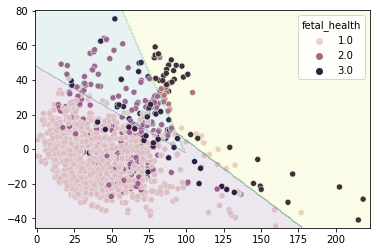

In [16]:
#No.3
i=2
validX=reduced_healthX.loc[i*rn:(i+1)*rn-1,['PCA1','PCA2','PCA3','PCA4']]
validY=reduced_healthY.loc[i*rn:(i+1)*rn-1]
trainX=reduced_healthX[~reduced_healthX.index.isin(validX.index)]
trainY=reduced_healthY[~reduced_healthY.index.isin(validY.index)]
scale=input("Scale you want--Enter N if you want normalization:")
if scale=='N':
    trainX['PCA1']=normalization(trainX['PCA1'])
    trainX['PCA2']=normalization(trainX['PCA2'])
    trainX['PCA3']=normalization(trainX['PCA3'])
    trainX['PCA4']=normalization(trainX['PCA4'])
    validX['PCA1']=normalization(validX['PCA1'])
    validX['PCA2']=normalization(validX['PCA2'])
    validX['PCA3']=normalization(validX['PCA3'])
    validX['PCA4']=normalization(validX['PCA4'])
    ht=0.01
else:
    scale=float(scale)
    trainX['PCA3']=scalarization(trainX['PCA3'], scale)
    validX['PCA3']=scalarization(validX['PCA3'], scale)
    ht=1
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(validX, validY)
print(scores)
#     sns.pairplot(pd.concat([trainX,trainY],axis=1),hue='Type')

plotX=trainX.loc[:,['PCA3','PCA4']]
plotY=trainY
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(plotX, plotY)
h=0.1
xx, yy = np.meshgrid(np.arange(np.min(plotX['PCA3'])-ht, np.max(plotX['PCA3'])+5*ht, ht),
                        np.arange(np.min(plotX['PCA4'])-10*h, np.max(plotX['PCA4'])+50*h, h))
Z = svmC.predict(np.c_[xx.ravel(), yy.ravel()])
temp=[]
for point in Z:
    temp.append(point)
Z=np.array(temp).reshape(xx.shape)
sns.scatterplot(np.array(plotX['PCA3']), np.array(plotX['PCA4']),hue=plotY['fetal_health'])
plt.contourf(xx, yy, Z, alpha=0.1)

Scale you want--Enter N if you want normalization:0.67


C:\Users\hp\AppData\Local\Temp/ipykernel_13248/1503194577.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX['PCA3']=scalarization(trainX['PCA3'], scale)
G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9576271186440678


G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
G:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


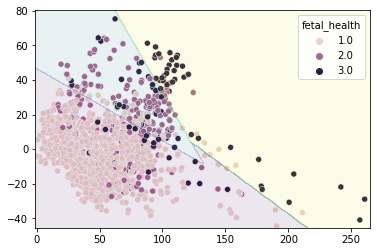

In [17]:
#No.4
i=3
validX=reduced_healthX.loc[i*rn:(i+1)*rn-1,['PCA1','PCA2','PCA3','PCA4']]
validY=reduced_healthY.loc[i*rn:(i+1)*rn-1]
trainX=reduced_healthX[~reduced_healthX.index.isin(validX.index)]
trainY=reduced_healthY[~reduced_healthY.index.isin(validY.index)]
scale=input("Scale you want--Enter N if you want normalization:")
if scale=='N':
    trainX['PCA1']=normalization(trainX['PCA1'])
    trainX['PCA2']=normalization(trainX['PCA2'])
    trainX['PCA3']=normalization(trainX['PCA3'])
    trainX['PCA4']=normalization(trainX['PCA4'])
    validX['PCA1']=normalization(validX['PCA1'])
    validX['PCA2']=normalization(validX['PCA2'])
    validX['PCA3']=normalization(validX['PCA3'])
    validX['PCA4']=normalization(validX['PCA4'])
    ht=0.01
else:
    scale=float(scale)
    trainX['PCA3']=scalarization(trainX['PCA3'], scale)
    validX['PCA3']=scalarization(validX['PCA3'], scale)
    ht=1
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(validX, validY)
print(scores)
#     sns.pairplot(pd.concat([trainX,trainY],axis=1),hue='Type')

plotX=trainX.loc[:,['PCA3','PCA4']]
plotY=trainY
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(plotX, plotY)
h=0.1
xx, yy = np.meshgrid(np.arange(np.min(plotX['PCA3'])-ht, np.max(plotX['PCA3'])+5*ht, ht),
                        np.arange(np.min(plotX['PCA4'])-10*h, np.max(plotX['PCA4'])+50*h, h))
Z = svmC.predict(np.c_[xx.ravel(), yy.ravel()])
temp=[]
for point in Z:
    temp.append(point)
Z=np.array(temp).reshape(xx.shape)
sns.scatterplot(np.array(plotX['PCA3']), np.array(plotX['PCA4']),hue=plotY['fetal_health'])
plt.contourf(xx, yy, Z, alpha=0.1)

Scale you want--Enter N if you want normalization:0.6


C:\Users\hp\AppData\Local\Temp/ipykernel_13248/984390588.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX['PCA3']=scalarization(trainX['PCA3'], scale)
G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8587570621468926


G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
G:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


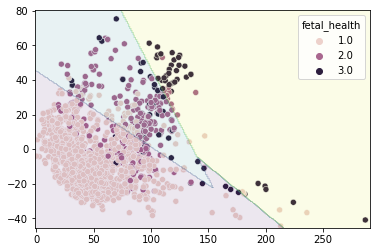

In [18]:
#No.5
i=4
validX=reduced_healthX.loc[i*rn:(i+1)*rn-1,['PCA1','PCA2','PCA3','PCA4']]
validY=reduced_healthY.loc[i*rn:(i+1)*rn-1]
trainX=reduced_healthX[~reduced_healthX.index.isin(validX.index)]
trainY=reduced_healthY[~reduced_healthY.index.isin(validY.index)]
scale=input("Scale you want--Enter N if you want normalization:")
if scale=='N':
    trainX['PCA1']=normalization(trainX['PCA1'])
    trainX['PCA2']=normalization(trainX['PCA2'])
    trainX['PCA3']=normalization(trainX['PCA3'])
    trainX['PCA4']=normalization(trainX['PCA4'])
    validX['PCA1']=normalization(validX['PCA1'])
    validX['PCA2']=normalization(validX['PCA2'])
    validX['PCA3']=normalization(validX['PCA3'])
    validX['PCA4']=normalization(validX['PCA4'])
    ht=0.01
else:
    scale=float(scale)
    trainX['PCA3']=scalarization(trainX['PCA3'], scale)
    validX['PCA3']=scalarization(validX['PCA3'], scale)
    ht=1
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(validX, validY)
print(scores)
#     sns.pairplot(pd.concat([trainX,trainY],axis=1),hue='Type')

plotX=trainX.loc[:,['PCA3','PCA4']]
plotY=trainY
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(plotX, plotY)
h=0.1
xx, yy = np.meshgrid(np.arange(np.min(plotX['PCA3'])-ht, np.max(plotX['PCA3'])+5*ht, ht),
                        np.arange(np.min(plotX['PCA4'])-10*h, np.max(plotX['PCA4'])+50*h, h))
Z = svmC.predict(np.c_[xx.ravel(), yy.ravel()])
temp=[]
for point in Z:
    temp.append(point)
Z=np.array(temp).reshape(xx.shape)
sns.scatterplot(np.array(plotX['PCA3']), np.array(plotX['PCA4']),hue=plotY['fetal_health'])
plt.contourf(xx, yy, Z, alpha=0.1)

In [39]:
trainX=reduced_healthX
trainY=reduced_healthY
trainX['PCA3']=scalarization(trainX['PCA3'], 0.67)
testX['PCA3']=scalarization(testX['PCA3'], 0.67)
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(testX, testY)
print(scores)

C:\Users\hp\AppData\Local\Temp/ipykernel_13248/3966182185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX['PCA3']=scalarization(trainX['PCA3'], 0.67)
C:\Users\hp\AppData\Local\Temp/ipykernel_13248/3966182185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testX['PCA3']=scalarization(testX['PCA3'], 0.67)
G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

0.8089887640449438


G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
G:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


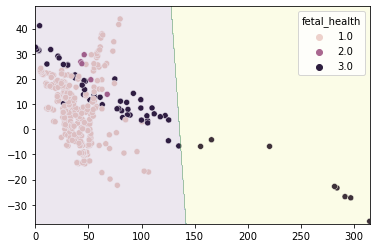

In [45]:
plotX=testX.loc[:,['PCA3','PCA4']]
plotY=testY
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(plotX, plotY)
h=0.1
xx, yy = np.meshgrid(np.arange(np.min(plotX['PCA3'])-h, np.max(plotX['PCA3'])+5*h, h),
                        np.arange(np.min(plotX['PCA4'])-10*h, np.max(plotX['PCA4'])+50*h, h))
Z = svmC.predict(np.c_[xx.ravel(), yy.ravel()])
temp=[]
for point in Z:
    temp.append(point)
Z=np.array(temp).reshape(xx.shape)
sns.scatterplot(np.array(plotX['PCA3']), np.array(plotX['PCA4']),hue=plotY['fetal_health'])
plt.contourf(xx, yy, Z, alpha=0.1)

In [33]:
trainX=healthX
trainY=healthY
testXO=healthX.loc[5*rn:,:]
testYO=healthY.loc[5*rn:,:]
trainX=healthX[~healthX.index.isin(testXO.index)]
trainY=healthY[~healthY.index.isin(testYO.index)]
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(testXO, testYO)
print(scores)

G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7584269662921348


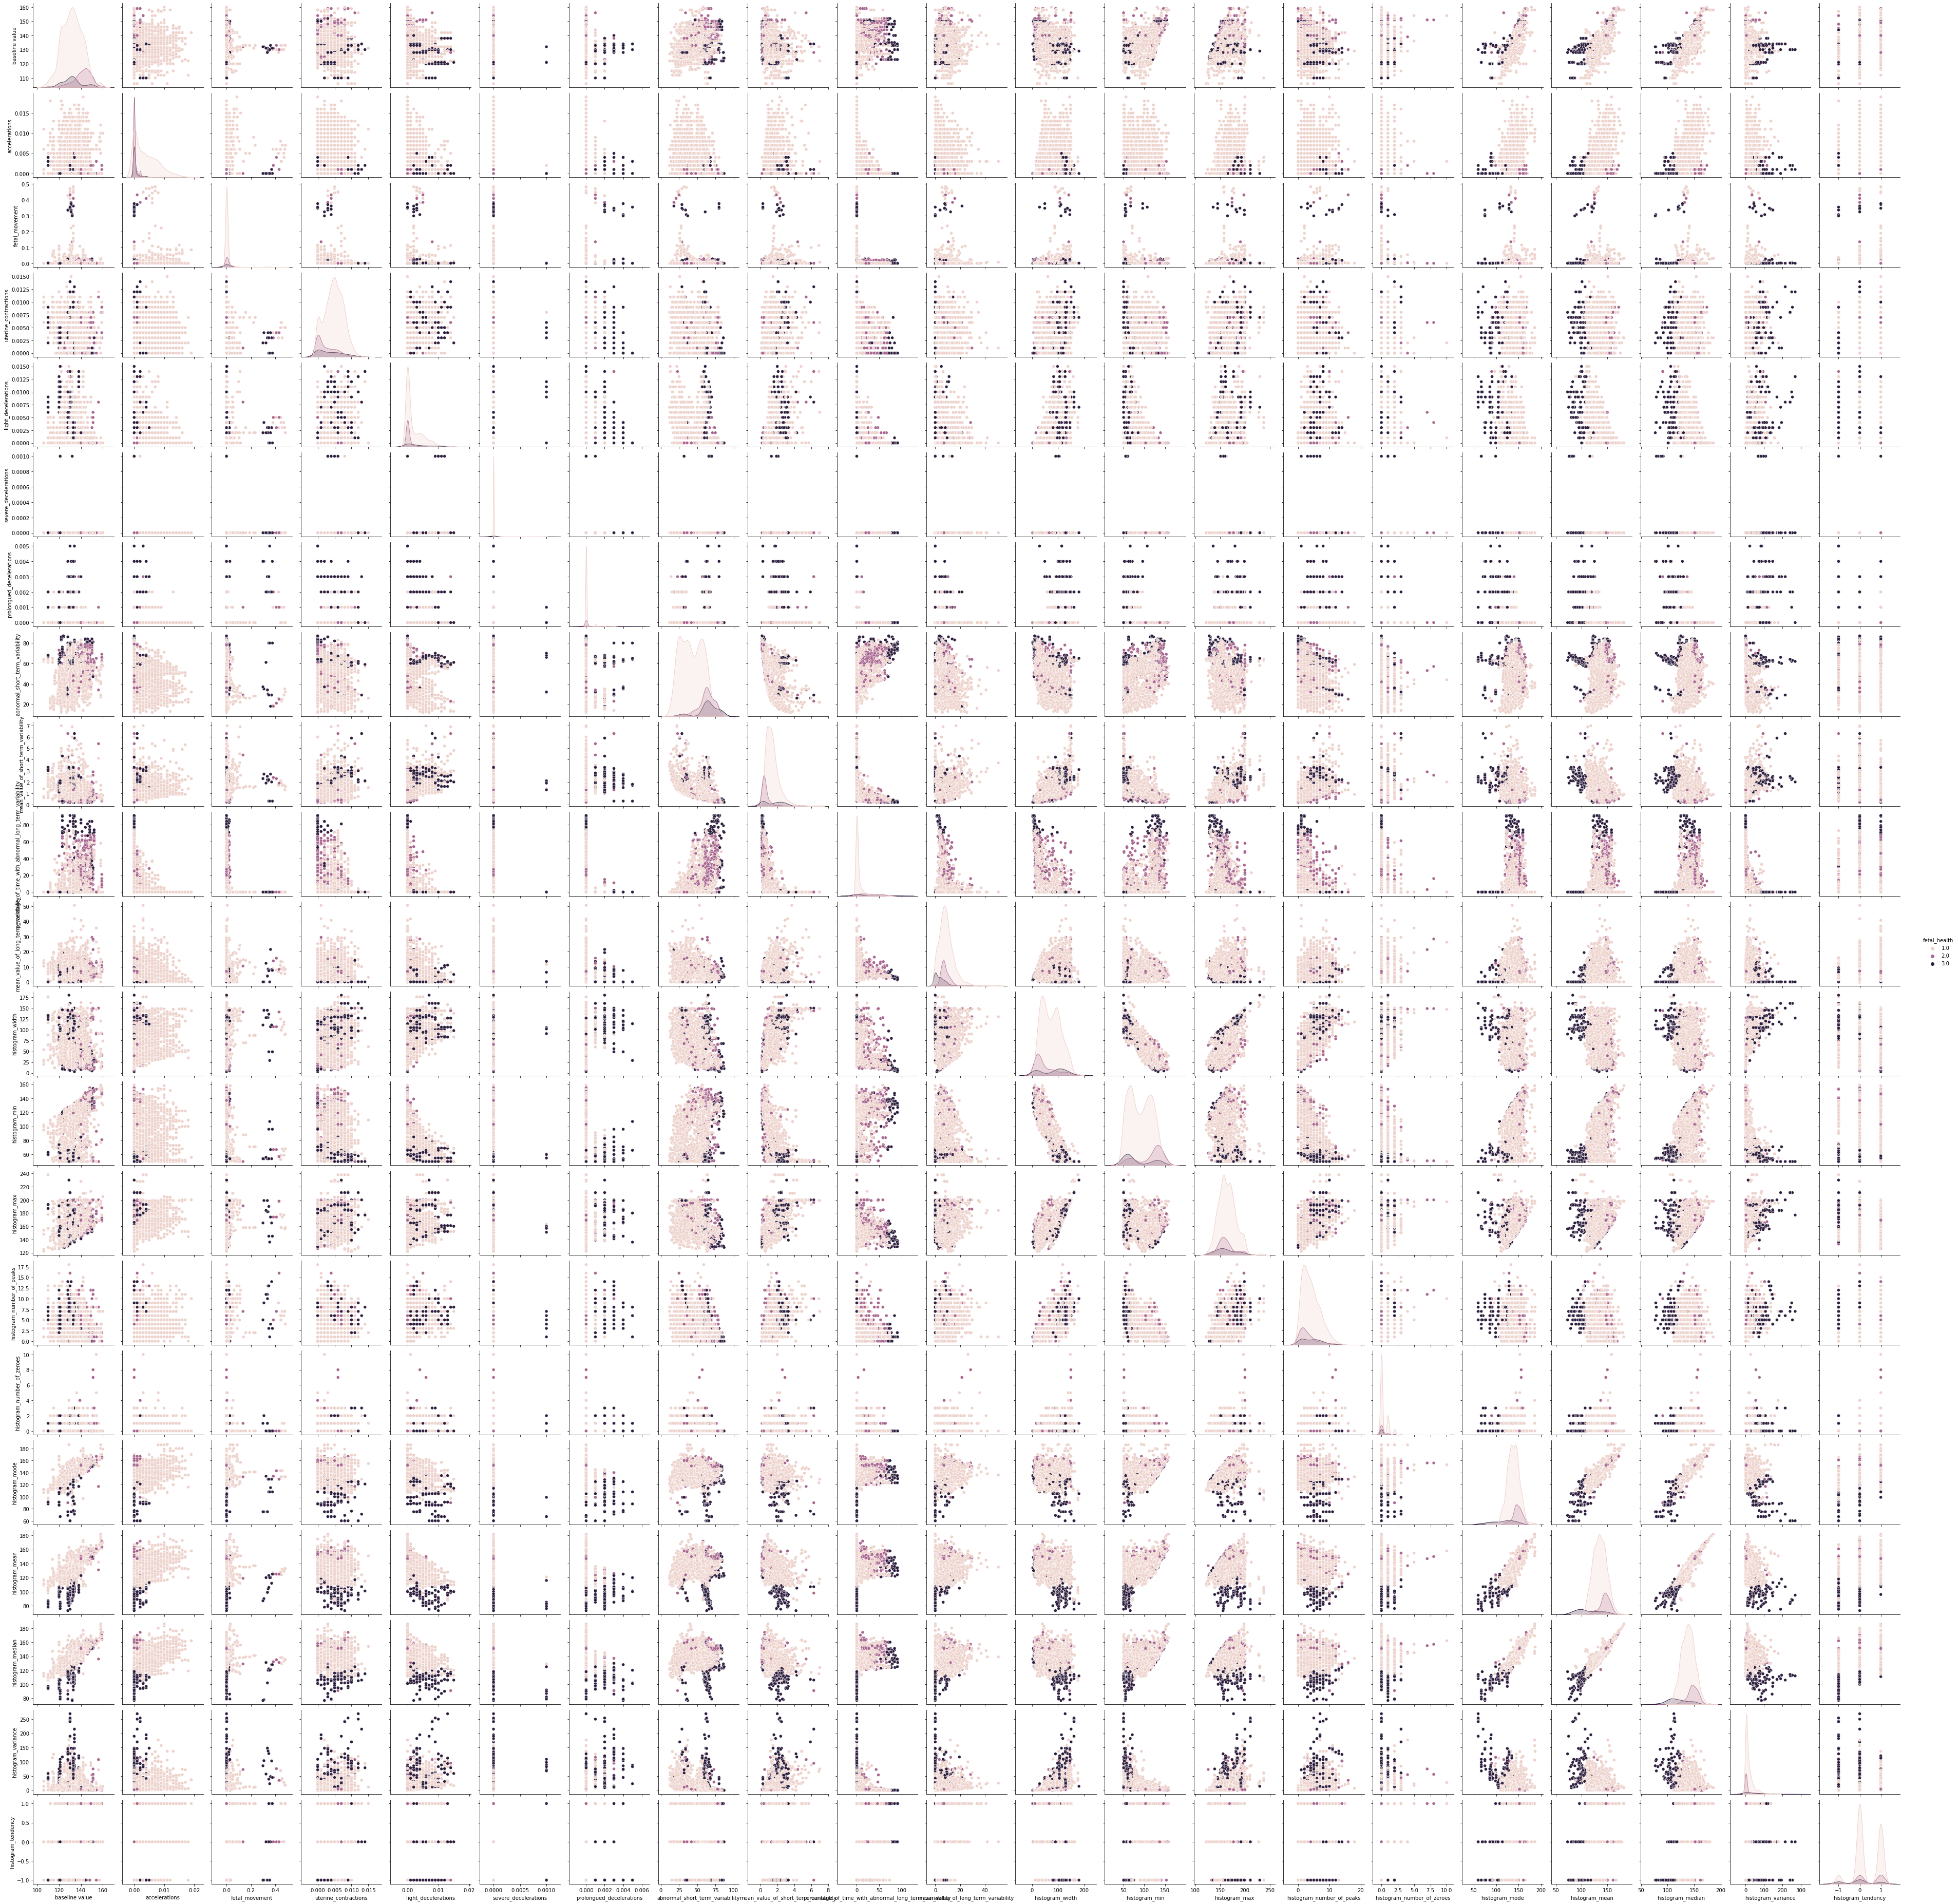

In [30]:
sns.pairplot(health,hue='fetal_health')

In [49]:
pd.set_option('max_row',200)
health.head(100)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0            120.0          0.000           0.000                 0.000   
1            132.0          0.006           0.000                 0.006   
2            133.0          0.003           0.000                 0.008   
3            134.0          0.003           0.000                 0.008   
4            132.0          0.007           0.000                 0.008   
5            134.0          0.001           0.000                 0.010   
6            134.0          0.001           0.000                 0.013   
7            122.0          0.000           0.000                 0.000   
8            122.0          0.000           0.000                 0.002   
9            122.0          0.000           0.000                 0.003   
10           151.0          0.000           0.000                 0.001   
11           150.0          0.000           0.000                 0.001   
12           131.0          0.005           0.072                 0.008   
13           131.0          0.009           0.222                 0.006   
14           130.0          0.006           0.408                 0.004   
15           130.0          0.006           0.380                 0.004   
16           130.0          0.006           0.441                 0.005   
17           131.0          0.002           0.383                 0.003   
18           130.0          0.003           0.451                 0.006   
19           130.0          0.005           0.469                 0.005   
20           129.0          0.000           0.340                 0.004   
21           128.0          0.005           0.425                 0.003   
22           128.0          0.000           0.334                 0.003   
23           128.0          0.000           0.000                 0.000   
24           128.0          0.000           0.000                 0.003   
25           124.0          0.000           0.000                 0.000   
26           124.0          0.000           0.000                 0.000   
27           124.0          0.000           0.000                 0.000   
28           132.0          0.000           0.135                 0.001   
29           132.0          0.000           0.099                 0.000   
30           132.0          0.000           0.108                 0.002   
31           132.0          0.000           0.112                 0.004   
32           132.0          0.000           0.089                 0.001   
33           120.0          0.008           0.103                 0.001   
34           120.0          0.009           0.085                 0.002   
35           120.0          0.006           0.109                 0.007   
36           115.0          0.005           0.079                 0.005   
37           114.0          0.005           0.000                 0.005   
38           115.0          0.006           0.065                 0.004   
39           115.0          0.009           0.055                 0.005   
40           114.0          0.008           0.058                 0.007   
41           114.0          0.006           0.047                 0.009   
42           116.0          0.002           0.038                 0.005   
43           116.0          0.004           0.012                 0.005   
44           122.0          0.000           0.018                 0.003   
45           122.0          0.000           0.020                 0.003   
46           122.0          0.000           0.005                 0.008   
47           122.0          0.002           0.003                 0.006   
48           122.0          0.003           0.006                 0.006   
49           158.0          0.005           0.000                 0.008   
50           158.0          0.005           0.000                 0.008   
51           156.0          0.000           0.000                 0.012   
52           156.0          0

In [43]:
trainX=healthX
trainY=healthY
testXO=healthX.loc[5*rn:,:]
testYO=healthY.loc[5*rn:,:]
trainX=healthX[~healthX.index.isin(testXO.index)]
trainY=healthY[~healthY.index.isin(testYO.index)]
trainX['histogram_mode']=scalarization(trainX['histogram_mode'],0.5)
testXO['histogram_mode']=scalarization(testXO['histogram_mode'],0.5)
svmC = svm.SVC(kernel='linear', C=1, random_state=42).fit(trainX, trainY)
scores = svmC.score(testXO, testYO)
print(scores)

C:\Users\hp\AppData\Local\Temp/ipykernel_13248/3397646761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX['histogram_mode']=scalarization(trainX['histogram_mode'],0.5)
C:\Users\hp\AppData\Local\Temp/ipykernel_13248/3397646761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testXO['histogram_mode']=scalarization(testXO['histogram_mode'],0.5)
G:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

0.7808988764044944
